n = 3
p = [3, 2, 1]
Diametro de la red (Pn) = 3.0


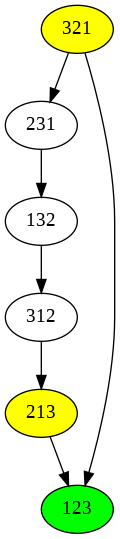

In [1]:
import pydot
from collections import defaultdict
from IPython.display import Image, display
sol = "" 
pn = 0

def lstr(p):
  return ''.join([str(elem) for elem in p])



def ModifiedBFSPreSols(s): 
        diam =[]

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if (d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
              diam.append(lstr(s))
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]  
                if (d != s) and not(lstr(d) in visited.keys()):
                 
                  if (d != sorted(d)):
                     node = pydot.Node(lstr(d))
                  else:
                    node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                  
                  G.add_node(node)
                  edge = pydot.Edge(lstr(s),lstr(d))
                  G.add_edge(edge)
                  graph[lstr(s)].append(lstr(d))
                  queue.append(d) 
                  if (d != sorted(d)):
                    visited[lstr(d)] = True 
        diametro(diam,graph)
      
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)
        
def diametro(diam,graph):

    global sol, pn
    niveles = {}
    #print(diam)
    sol = diam[-1]
    while sol != lstr(p):    
      for i in graph.values():
        if sol in i:
          sol = i
          #print(sol)
          pn += 1
          sol = list(graph.keys())[list(graph.values()).index(sol)]
    if pn % 2 == 0:
      print("Diametro de la red (Pn) = " + str((pn+2)/2))
      pn = 0
    else: 
      print("Diametro de la red (Pn) = " + str((pn+3)/2))
      pn = 0


n = 3
p = [3,2,1]
while n < 4 :
  print("n = " + str(len(p)))
  print("p = " + str(p))
  ModifiedBFSPreSols(p)
  n += 1
  p.insert(0,n)
